# Importing Libraries and Loading Dataset

In [173]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Loading Customer Churn Dataset
df = pd.read_csv('Churn_Modelling.csv')

In [175]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Exploration and Preprocessing

In [176]:
# Displaying the shape of the dataset (number of rows, number of columns)
df.shape

(10000, 14)

In [177]:
# Displaying dataset information (data types, number of non-null values, columns and rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##### From the information on our dataframe:
1. There are no missing values in any of the columns.
2. All columns are numerical (float64 or int64) which is suitable for machine learning models except for 'Surname', 'Gender', 'Geography' which are categorical in nature.

##### Potential Preprocessing Steps:
1. Drop the 'CustomerId', 'Surname', and 'RowNumber' columns as they likely do not provide meaningful information for classification.
2. Encode the 'Geography' and 'Gender' columns to numerical values for model training.
3. Normalise or scale features

In [178]:
# Remove the 'id' and 'Unnamed: 32' columns from the DataFrame
df.drop(['CustomerId', 'Surname', 'RowNumber'], axis =1, inplace = True )

In [179]:
df.groupby('Geography').mean(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [180]:
df.groupby('Gender').mean(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [181]:
# One Hot Encoding the Geography and Gender Columns
df = pd.get_dummies(data=df, drop_first=True, dtype = 'int64')

In [182]:
# Generating descriptive statistics of the DataFrame
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [183]:
# Check the distribution of 'diagnosis' to understand the class balance.
class_distribution = df['Exited'].value_counts()
print(class_distribution)

Exited
0    7963
1    2037
Name: count, dtype: int64


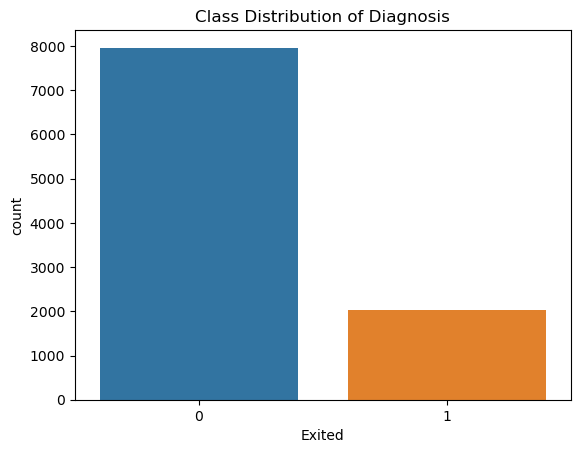

In [184]:
# Visualising class balance.
sns.countplot(x='Exited', data= df, label = 'count')
plt.title('Class Distribution of Diagnosis')
plt.show()

## Correlation matrix and heatmap

In [185]:
corr = df.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<Axes: >

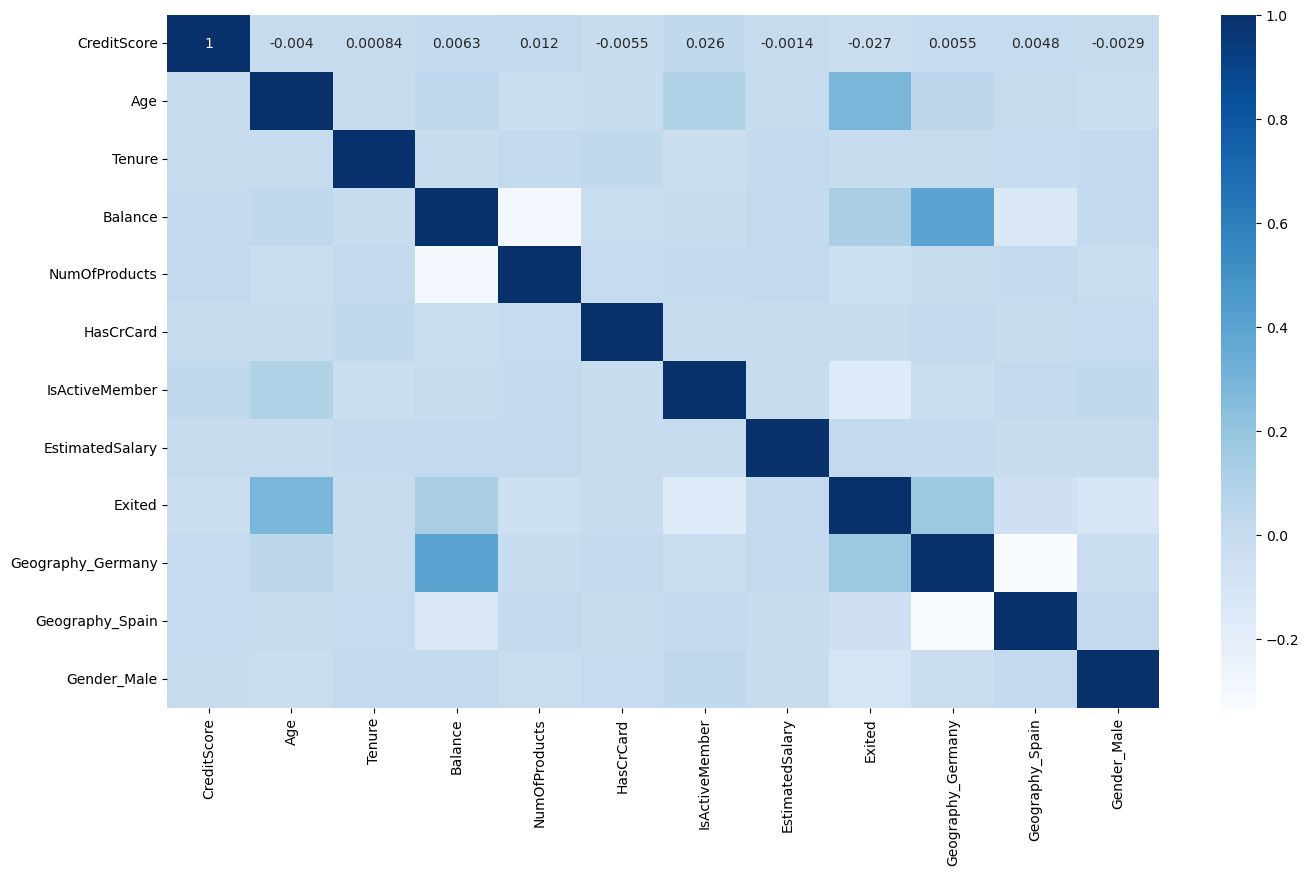

In [186]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, cmap = "Blues", annot=True)

## Splitting the dataset

In [187]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [188]:
# independent / Matrix of feature
X = df.drop('Exited', axis = 1)

In [189]:
# target/dependent variable
y = df['Exited']

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature scaling

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

In [194]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [195]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [196]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Part 2: Building the model

## 1) Logistic regression

In [197]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [198]:
y_pred = classifier_lr.predict(X_test)

In [199]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [200]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [201]:
results = pd.DataFrame([['Logistic regression', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])


results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [202]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1526   69]
 [ 309   96]]


### Cross validation

In [203]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.85 %
Standard Deviation is 0.86 %


## 2) Random forest

In [204]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [205]:
y_pred = classifier_rf.predict(X_test)

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [207]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [208]:
model_results = pd.DataFrame([['Random forest', acc, f1, prec, rec]],
                       columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [209]:
results = pd.concat([results, model_results], ignore_index=True)

In [210]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random forest,0.867,0.613372,0.745583,0.520988


In [211]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1523   72]
 [ 194  211]]


### Cross validation

In [212]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X= X_train, y= y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


# Part 3: Predicting a single observation

In [213]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [214]:
single_obs = [[625,	45,	5,	12500.01,	1,	0,	1,	101348.88, 0,	0, 1]]

In [215]:
classifier_lr.predict(scaler.transform(single_obs))

c:\Users\Victor\anaconda3\envs\ML_Env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [216]:
classifier_rf.predict(scaler.transform(single_obs))

c:\Users\Victor\anaconda3\envs\ML_Env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)